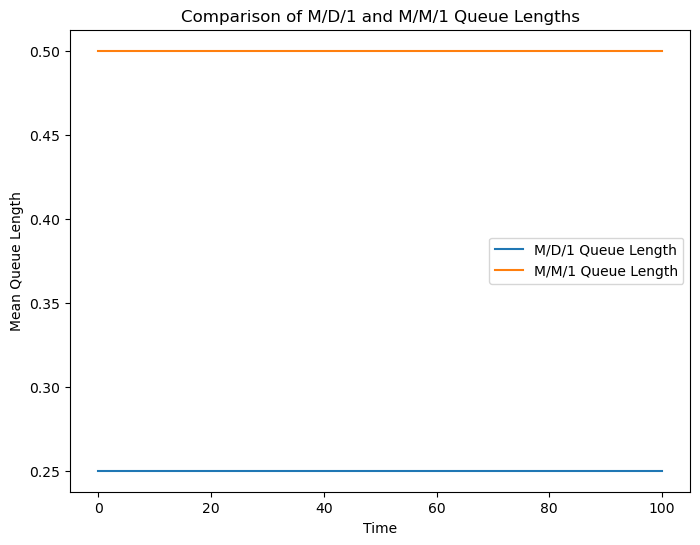

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
lambda_arrival = 0.5  # Arrival rate
mu_service = 1.0  # Service rate

# Define the time range
t_max = 100
t = np.linspace(0, t_max, 1000)

# Calculate the mean queue length for M/D/1
rho_D = lambda_arrival / mu_service
L_qD = (rho_D**2) / (2 * (1 - rho_D))

# Calculate the mean queue length for M/M/1
rho_M = lambda_arrival / mu_service
L_qM = rho_M**2 / (1 - rho_M)

# Plot the queue lengths
plt.figure(figsize=(8, 6))
plt.plot(t, L_qD * np.ones_like(t), label='M/D/1 Queue Length')
plt.plot(t, L_qM * np.ones_like(t), label='M/M/1 Queue Length')
plt.xlabel('Time')
plt.ylabel('Mean Queue Length')
plt.title('Comparison of M/D/1 and M/M/1 Queue Lengths')
plt.legend()
plt.show()

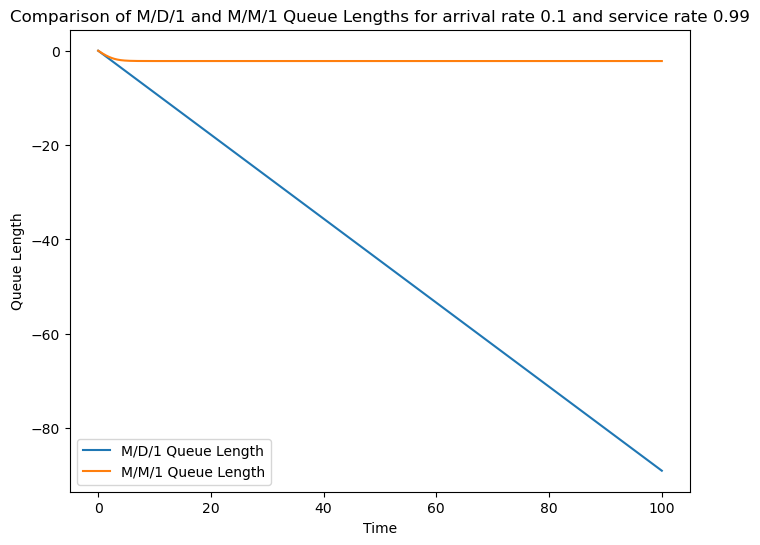

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
lambda_arrival = 0.1  # Arrival rate
mu_service = 0.99  # Service rate
t_max = 100  # Maximum time
num_points = 1000  # Number of points to calculate

# Calculate the time step
dt = t_max / (num_points - 1)

# Initialize arrays for time and queue lengths
t = np.linspace(0, t_max, num_points)
Q_D = np.zeros_like(t)  # Queue length for M/D/1
Q_M = np.zeros_like(t)  # Queue length for M/M/1

# Calculate the queue lengths
for i in range(1, num_points):
    # Calculate the utilization factor
    rho = lambda_arrival / mu_service

    # Update the queue lengths
    Q_D[i] = Q_D[i - 1] + dt * (lambda_arrival - mu_service * (1 - rho * np.heaviside(Q_D[i - 1], 0.5)))
    Q_M[i] = Q_M[i - 1] + dt * (lambda_arrival - mu_service * (1 - rho * np.exp(-Q_M[i - 1])))

# Plot the queue lengths
plt.figure(figsize=(8, 6))
plt.plot(t, Q_D, label='M/D/1 Queue Length')
plt.plot(t, Q_M, label='M/M/1 Queue Length')
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.title(f'Comparison of M/D/1 and M/M/1 Queue Lengths for arrival rate {lambda_arrival} and service rate {mu_service}')
plt.legend()
plt.show()